In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from collections import Counter
from itertools import chain
nltk.download('stopwords')
! pip install transformers
from transformers import AutoTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.3 MB/s eta 0:00:00


# Loading the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
lang_list = os.listdir("/content/drive/MyDrive/Projet_Pandas/metadata/metadata")
dfs = [pd.read_csv(f"/content/drive/MyDrive/Projet_Pandas/metadata/metadata/{lang}/cv-corpus-15.0-2023-09-08/{lang}/train.tsv", delimiter='\t') for lang in os.listdir("/content/drive/MyDrive/Projet_Pandas/metadata/metadata")]
dfs_test = [pd.read_csv(f"/content/drive/MyDrive/Projet_Pandas/metadata/metadata/{lang}/cv-corpus-15.0-2023-09-08/{lang}/test.tsv", delimiter='\t') for lang in os.listdir("/content/drive/MyDrive/Projet_Pandas/metadata/metadata")]
df = pd.concat(dfs+dfs_test, ignore_index=True)
df

<ipython-input-4-0b23acf99c1c>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f"/content/drive/MyDrive/Projet_Pandas/metadata/metadata/{lang}/cv-corpus-15.0-2023-09-08/{lang}/train.tsv", delimiter='\t') for lang in os.listdir("/content/drive/MyDrive/Projet_Pandas/metadata/metadata")]


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046235.mp3,Su experiencia profesional se concentra en el ...,2,0,NaN,NaN,NaN,NaN,es,NaN
1,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046331.mp3,Su sitio web con información y una lista de af...,2,1,NaN,NaN,NaN,NaN,es,NaN
2,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046333.mp3,"En el viaje, Jule abandonó el grupo.",2,0,NaN,NaN,NaN,NaN,es,NaN
3,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046335.mp3,"De esta manera, Guía surge como un núcleo pobl...",2,0,NaN,NaN,NaN,NaN,es,NaN
4,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046338.mp3,El reparto está formado por Josema Yuste y Flo...,2,1,NaN,NaN,NaN,NaN,es,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3087044,5f9f2087a5ca29556e69014e4f8da5bb8a4772f5fa6c70...,common_voice_zh-CN_22210780.mp3,科顿在六岁时就开始演戏。,2,0,twenties,male,出生地：37 山东省,NaN,zh-CN,NaN
3087045,5f9f2087a5ca29556e69014e4f8da5bb8a4772f5fa6c70...,common_voice_zh-CN_22210781.mp3,魏大斌人。,2,0,twenties,male,出生地：37 山东省,NaN,zh-CN,NaN
3087046,65c0226bf6dd87733b5256a051486aa9cfdb576dcc7894...,common_voice_zh-CN_33029379.mp3,额我略七世是在罗马天主教历史中的一个重要的改革者之一。,2,0,NaN,NaN,NaN,NaN,zh-CN,NaN
3087047,65c0226bf6dd87733b5256a051486aa9cfdb576dcc7894...,common_voice_zh-CN_33030275.mp3,八丈岛是日本伊豆群岛中的一个岛屿。,3,2,NaN,NaN,NaN,NaN,zh-CN,NaN


In [ ]:
import os
import pandas as pd
dfs_durations = [pd.read_csv(f"/content/drive/MyDrive/Projet_Pandas/metadata/metadata/{lang}/cv-corpus-15.0-2023-09-08/{lang}/clip_durations.tsv", delimiter='\t') for lang in os.listdir("/content/drive/MyDrive/Projet_Pandas/metadata/metadata")]
df_durations = pd.concat(dfs_durations, ignore_index=True)

In [ ]:
df_all = pd.merge(df, df_durations, left_on="path", right_on="clip", validate="1:1")
df_all[:10]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,clip,duration[ms]
0,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046235.mp3,Su experiencia profesional se concentra en el ...,2,0,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046235.mp3,5856
1,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046331.mp3,Su sitio web con información y una lista de af...,2,1,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046331.mp3,7032
2,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046333.mp3,"En el viaje, Jule abandonó el grupo.",2,0,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046333.mp3,5280
3,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046335.mp3,"De esta manera, Guía surge como un núcleo pobl...",2,0,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046335.mp3,6600
4,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046338.mp3,El reparto está formado por Josema Yuste y Flo...,2,1,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046338.mp3,6312
5,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046434.mp3,En las Cortes republicanas se integró en el gr...,2,0,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046434.mp3,6816
6,931802e03fe2dbcae3395e661a103621efc982572ce02f...,common_voice_es_22046437.mp3,"La sabina, pese a ser una árbol mediterráneo, ...",2,0,NaN,NaN,NaN,NaN,es,NaN,common_voice_es_22046437.mp3,8304
7,93efeff8dd8afadbfc5df9118e6aef1e7e3fc083c21bbc...,common_voice_es_19765754.mp3,"Durante este período, Edmund Whittaker present...",2,0,thirties,male,México,NaN,es,NaN,common_voice_es_19765754.mp3,8232
8,93efeff8dd8afadbfc5df9118e6aef1e7e3fc083c21bbc...,common_voice_es_19765755.mp3,"El ""Tania"" está formado por cinco secciones.",2,0,thirties,male,México,NaN,es,NaN,common_voice_es_19765755.mp3,4392
9,93efeff8dd8afadbfc5df9118e6aef1e7e3fc083c21bbc...,common_voice_es_19765756.mp3,A continuación se describen los tipos más comu...,2,0,thirties,male,México,NaN,es,NaN,common_voice_es_19765756.mp3,4872


#PART 1 : Analyzing CommonVoice

## 1- For each language, determine the total duration of recording and the number of different speakers

In [ ]:
df_language_durations = df_all.groupby("locale")["duration[ms]"].sum() / 1000

In [ ]:
df_language_durations

locale
ar        162160.035
de       3341755.685
en       6174878.911
es       1720018.728
fr       2820768.179
id         42566.295
it        975913.433
ja         57698.436
lg        466082.146
ru        192763.014
sw        305649.144
ta        329813.232
tr        149813.327
zh-CN     215156.913
Name: duration[ms], dtype: float64

In [ ]:
df_all_speakers = df_all.groupby("locale")["client_id"].nunique()
df_all_speakers

locale
ar         982
de       12277
en       47861
es       10990
fr       12153
id         332
it        5098
ja        1073
lg         514
ru        2144
sw         956
ta         471
tr        1268
zh-CN     3454
Name: client_id, dtype: int64

##2- For each language and each genre determine the total duration of recordings, the number of different speakers, the average, median, min and max number of recordings per speaker.

In [ ]:
df_lang_gender = pd.concat(axis = 1,
                           objs = [
                               df_all.groupby(["locale", "gender"])["client_id"].nunique(),
                               df_all.groupby(["locale", "gender"])["duration[ms]"].sum(),
                               df_all.groupby(["locale", "gender", "client_id"])["client_id"].count().groupby(["locale","gender"]).agg(["min", "max", "median", "mean"])
                           ])
df_lang_gender

client_id  duration[ms]  min    max  median        mean
locale gender                                                         
ar     female         87      26649792    1   1286    17.0   71.988506
       male          301      35590808    1   1174     8.0   27.312292
       other           8        149616    1     19     3.0    4.875000
de     female        576     256048399    1   3068    18.0   77.555556
       male         3111    1857171870    1  60854    15.0  104.833815
       other          50      24376606    1   2731    14.5   94.620000
en     female       3177    1211778903    1   9795    11.0   66.204910
       male        11394    2965272609    1  47480     8.0   46.338336
       other         330     131645246    1   8137    14.0   73.615152
es     female       1095     474956697    1  20353    12.0   84.236530
       male         2775     942259406    1  32827    10.0   65.994955
       other          57       5760696    1    435     3.0   18.614035
fr     female        784     319672321    1  10019    16.0   76.658163
       male         3096    1655909827    1  33257    17.0  103.769703
       other          81      25974768    1    933    20.0   65.851852
id     female         32       9280080    1   1309     8.5   55.875000
       male          118      16517868    1   1726     8.5   29.516949
       other           2         98232    1     20    10.5   10.500000
it     female        274     109038222    1   1336    20.0   71.189781
       male         1193     589875833    1   6231    19.0   94.367142
       other           7       2994576    1    334    19.0   71.714286
ja     female        187      11959056    1   1147     5.0   12.245989
       male          435      32708688    1   2758     5.0   15.947126
       other           9        261912    3     17     5.0    6.555556
lg     female        174     220661851    1   2300    91.5  210.936782
       male          177     137189856    1   3259    41.0  133.514124
ru     female        231      29305620    1   1037     5.0   24.432900
       male          650     102080507    1    956     8.0   29.844615
       other           5        491364    1     57     5.0   21.400000
sw     female        226     104038884    1   1293    22.0   83.765487
       male          247      81938232    1    818    12.0   59.789474
ta     female         66      68688804    1   2515    25.0  175.378788
       male          165      55202004    1   4195     8.0   54.503030
tr     female         65      38262396    1   6786     9.0  171.784615
       male          345      64833162    1   4894     8.0   54.649275
       other           8        455112    4     43    10.0   15.375000
zh-CN  female         90      16903968    1   1284     6.0   36.322222
       male          485      96441923    1    886     5.0   37.004124
       other           9       1403388    1    227     3.0   28.222222

## 3- Which language has the highest proportion of recordings by a person in the largest age bracket considered ?

In [ ]:
df_oldest = (df_all[df_all["age"] == "nineties"].groupby(["locale", "client_id"])["client_id"].count() / df_all[df_all["age"] == "nineties"].groupby("locale")["client_id"].count()).rename("part").to_frame()
df_oldest.groupby("locale")["part"].max()

locale
ar       1.000000
de       1.000000
en       0.363014
es       0.721519
it       1.000000
ja       1.000000
lg       1.000000
zh-CN    1.000000
Name: part, dtype: float64

## 4- Determine the number of different genres considered in the corpus. What is the percentage of recordings for which no genre information is available ? Plot the genre distribution (including cases where gender information is not available). Do the same for ages.

There are 3 genders in the corpora
there are 0.3021357937629108 percent of recording without gender information


<Axes: title={'center': 'gender distribution'}>

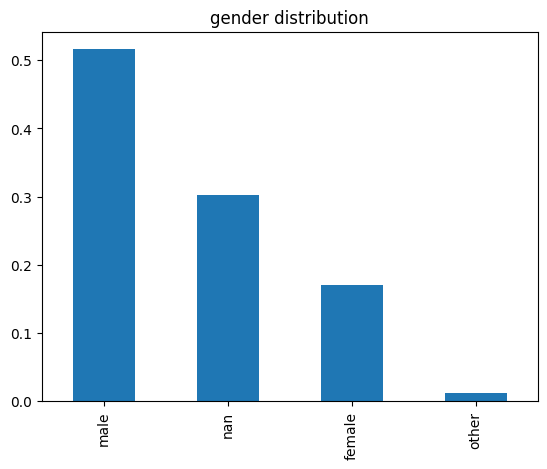

In [ ]:
import matplotlib
nb_gender = df_all["gender"].nunique()
print(f"There are {nb_gender} genders in the corpora")
proportion_no_gender = df_all["gender"].isnull().sum()/len(df_all)
print(f"there are {proportion_no_gender} percent of recording without gender information")

df_all["gender"].value_counts(dropna=False, normalize=True).plot(kind="bar", title="gender distribution")

<Axes: title={'center': 'age distribution'}>

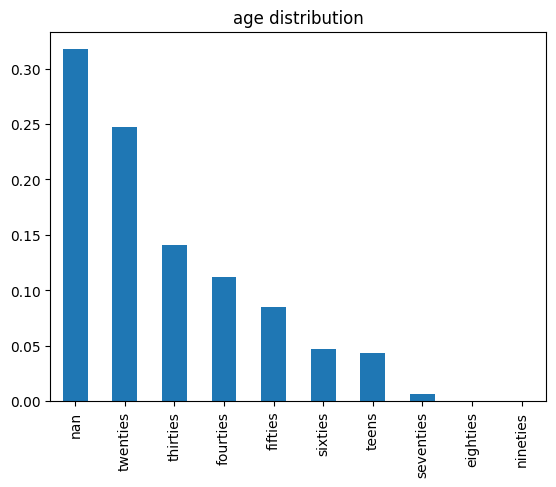

In [ ]:
df_all["age"].value_counts(dropna=False, normalize=True).plot(kind="bar", title="age distribution")

## 5- Find out for each language and each genre the 7 speakers who produced the most recordings.

In [ ]:
df7_most = df_all.groupby(["locale", "gender","client_id"]).size().groupby(["locale", "gender"]).nlargest(7)
df7_most

locale  gender  locale  gender  client_id                                                                                                                       
ar      female  ar      female  78c954e30fd3a81e4abc72008b6c25427f6cb545275c5943ce4738b03fa925b79f5e5030d5f94da8366238331eb35c0090ab27f2a0bc093caff1766115acc968    1286
                                5f810213ca8e05e0d27a618d7a9e06c8ce4a2f4ca21eabba89f66c39d71497884932c2eb438743f36962c6e64e90250189ac1735c27b82871ae3a172a4824f42    1019
                                fc3b87e39142b5fced5eb2422f0f5277bdf471c8865e9a233c413e9271695f8e33e209c8b52065c951b7b4e8eef446a928074b5e28b9961a6f4c6cb9849325c7     526
                                d7517b67ab736aa3e93a6ff78544e9f6e5be25406515228c0b8ab2b8a63df2ec848595f61d13d13d5401bfe2f6bd8bb72a494cc94f2e08cdb35644735606b4b0     492
                                c8a5a7e7ec79a0962b671878dc7de66774a4c7c58afb3a3d7dbf29150c4414d92caf11a23d1e0935954a02b80d6f845bb589cb1fbdb2ec420e4c89ded7a4fd91   

## 6- For each language, create a 1-hour test set and a training set as large as possible, ensuring that speakers from the test set do not appear in the training set

In [ ]:
df_new = df_all.groupby(["locale", "client_id"])["duration[ms]"].sum().groupby("locale").cumsum().rename("sums").reset_index()
#retrieve client ids
test = df_new[df_new["sums"] < 3_600 * 1000]
train = df_new[(df_new["sums"] > 3_600 * 1000) & ( df_new["client_id"].isin(test["client_id"]) == False)]

#retrieve audio path corresponding to client ids
test = df_all[df_all["client_id"].isin(test["client_id"])]["path"]
train = df_all[df_all["client_id"].isin(train["client_id"])]["path"]

In [ ]:
train

0             common_voice_es_22046235.mp3
1             common_voice_es_22046331.mp3
2             common_voice_es_22046333.mp3
3             common_voice_es_22046335.mp3
4             common_voice_es_22046338.mp3
                        ...               
3087044    common_voice_zh-CN_22210780.mp3
3087045    common_voice_zh-CN_22210781.mp3
3087046    common_voice_zh-CN_33029379.mp3
3087047    common_voice_zh-CN_33030275.mp3
3087048    common_voice_zh-CN_32613092.mp3
Name: path, Length: 3076005, dtype: object

In [ ]:
test

780           common_voice_es_20088673.mp3
781           common_voice_es_20088674.mp3
782           common_voice_es_20088675.mp3
783           common_voice_es_20088676.mp3
784           common_voice_es_20088677.mp3
                        ...               
3086594    common_voice_zh-CN_22083508.mp3
3086595    common_voice_zh-CN_22083509.mp3
3086596    common_voice_zh-CN_22083510.mp3
3086597    common_voice_zh-CN_22083511.mp3
3086598    common_voice_zh-CN_22083512.mp3
Name: path, Length: 11044, dtype: object

## 7- How many languages have more female than male recordings ?


In [ ]:
df_all.groupby(["locale", "gender"])["client_id"].count().unstack()["male"]>df_all.groupby(["locale", "gender"])["client_id"].count().unstack()["female"]

locale
ar        True
de        True
en        True
es        True
fr        True
id        True
it        True
ja        True
lg       False
ru        True
sw       False
ta       False
tr        True
zh-CN     True
dtype: bool

## 8- Which language has the most unbalanced gender distribution ?


In [ ]:
( df_all.groupby(["locale", "gender"])["client_id"].count().unstack()["female"]/df_all.groupby(["locale"])["client_id"].count() - df_all.groupby(["locale", "gender"])["client_id"].count().unstack()["male"]/df_all.groupby(["locale"])["client_id"].count() ).abs().idxmax()

'it'

## 9- For each language, create a train set containing 1 hour of recordings and a 10-minute test set so that : i) train and test are gender-balanced ii) the train and test speakers are different

In [ ]:
df_new = df_all.groupby(["locale", "gender", "client_id"])["duration[ms]"].sum().groupby(["locale","gender"]).cumsum().rename("sums").reset_index()

#retrieve client ids
test = df_new[df_new["sums"] < 10/df_all["gender"].nunique() * 60 * 1000]
train = df_new[(df_new["sums"] > 10/df_all["gender"].nunique() * 60 * 1000 ) & (df_new["sums"] < 60 * 60 * 1000)]

#retrieve audio path corresponding to client ids
test = df_all[df_all["client_id"].isin(test["client_id"])]["path"]
train = df_all[df_all["client_id"].isin(train["client_id"])]["path"]


In [ ]:
train

1175          common_voice_es_20256758.mp3
1176          common_voice_es_20256760.mp3
1177          common_voice_es_20256761.mp3
1178          common_voice_es_20256816.mp3
1179          common_voice_es_20256818.mp3
                        ...               
3086710    common_voice_zh-CN_22145414.mp3
3086711    common_voice_zh-CN_22145416.mp3
3086712    common_voice_zh-CN_22145417.mp3
3086713    common_voice_zh-CN_22145418.mp3
3086714    common_voice_zh-CN_22145419.mp3
Name: path, Length: 27788, dtype: object

In [ ]:
test

6950          common_voice_es_27340674.mp3
6951          common_voice_es_27340682.mp3
6952          common_voice_es_27340772.mp3
6953          common_voice_es_27340803.mp3
6954          common_voice_es_27340832.mp3
                        ...               
3086850    common_voice_zh-CN_21367523.mp3
3086851    common_voice_zh-CN_21367529.mp3
3086852    common_voice_zh-CN_21367531.mp3
3086853    common_voice_zh-CN_21367532.mp3
3086854    common_voice_zh-CN_21367533.mp3
Name: path, Length: 5739, dtype: object

## 10- Plot, for each language, a box plot representing the distribution of the number of words per sentence.

We will tokenize first all sentence in corpora, since this operation is costly and we need it for the following question as well. This way we tokenize only once every sentence in the df.
We use mBERT tokenizer in order to cover a much as languages as possible and still be pretty consistent in tokenization between languages.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
df_all["tokenized"] = df_all["sentence"].apply(lambda x: tokenizer.tokenize(str(x)))

Token indices sequence length is longer than the specified maximum sequence length for this model (931 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
df_all['num_words'] = df_all["tokenized"].apply(lambda x: len(x))

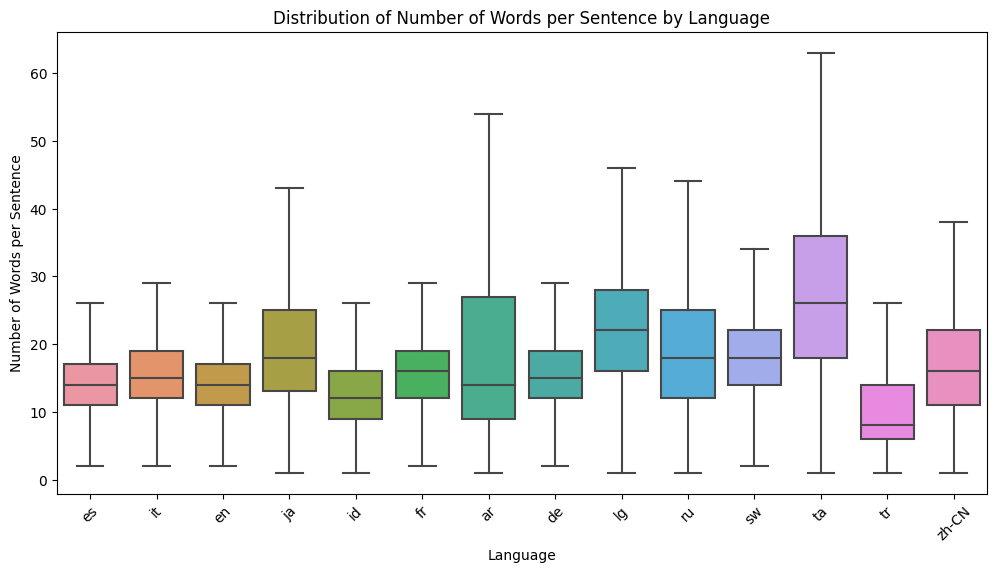

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='locale', y='num_words', data=df_all, showfliers=False)
plt.xticks(rotation=45)
plt.title("Distribution of Number of Words per Sentence by Language")
plt.xlabel("Language")
plt.ylabel("Number of Words per Sentence")
plt.show()

## 11- For each language, find the 17 most frequent words after having removed stop words.


In [ ]:
languages={'ar':'arabic','de':'german','en':'english','es':'spanish', 'fr':'french','id':'indonesian','it':'italian', 'ru':'russian','tr': 'turkish','zh-CN':'chinese'}
languages_no_stopwords=['japanese','ganda','swahili','tamoul']

stopwords_dict={lang_id: stopwords.words(lang)+["sentence"] for lang_id,lang in languages.items() }
stopwords_dict.update({'ja':[],'lg':[],'sw':[],'ta':[]})
print(stopwords_dict)

{'ar': ['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'ف

In [ ]:
df_all.groupby(['locale'])["tokenized"].apply(lambda x: Counter([word.lower() for word in chain.from_iterable(x) if word.lower() not in stopwords_dict.get(x.name) and word.isalpha()]).most_common(17))

locale
ar       [(ال, 25962), (إ, 3216), (با, 1196), (تو, 924)...
de       [(wurde, 37928), (g, 27327), (be, 27269), (ge,...
en       [(also, 68798), (two, 30343), (one, 29784), (f...
es       [(dos, 8676), (re, 8348), (des, 7481), (in, 68...
fr       [(a, 43227), (cette, 23383), (plus, 21928), (d...
id       [(men, 1158), (be, 844), (me, 679), (say, 513)...
it       [(ri, 7689), (s, 7433), (due, 6043), (stato, 4...
ja       [(の, 4610), (は, 3534), (に, 3048), (を, 2945), (...
lg       [(ok, 43320), (mu, 34641), (ab, 30643), (ku, 2...
ru       [(р, 4118), (м, 2951), (это, 2731), (пред, 195...
sw       [(wa, 33116), (ya, 28621), (na, 25873), (ku, 1...
ta       [(க, 37589), (ப, 33357), (வ, 30888), (அ, 29818...
tr       [(bir, 6161), (g, 3216), (ç, 2668), (m, 2297),...
zh-CN    [(国, 6185), (中, 4927), (人, 4868), (大, 3905), (...
Name: tokenized, dtype: object

## 12- Compute, for each language, the size of the available data both in terms of duration and in terms of number of words.

In [ ]:
df_all.groupby("locale")[["num_words","duration[ms]"]].sum()

,num_words,duration[ms]
locale,,
ar,865170,162160035
de,9027918,3341755685
en,15134065,6174878911
es,4705066,1720018728
fr,8659565,2820768179
id,112276,42566295
it,2782875,975913433
ja,239352,57698436
lg,2051038,466082146


# PART 2: Inaugural Adresses
"Inaugural Addresses" are speeches made by elected presidents following a public ceremony
in which they take the oath of office. The aim of this exercise is to determine the similarity
between these speeches. Specifically, you’ll need to write the code that reproduces the plot in
Figure 1. To do this, you will find an archive on the course website containing the inaugural
addresses of almost every American president.
You must :
*   build a DataFrame that associates the name of each president with the vector tf.idf representing his or her speech (you will find the necessary methods in the sklearn library).
*   measure the similarity (e.g. cosine similarity) between all pairs of speeches.
*  perform a hierarchical clustering and obtain the plot.

## 13- Reproduce the plot of Figure 1.


In [ ]:
import numpy as np
df_president = pd.DataFrame({"path": [path for path in os.listdir("/content/drive/MyDrive/Projet_Pandas/US_Inaugural_Addresses/US_Inaugural_Addresses") if path[0].isdigit()]})
df_president["year"] = df_president["path"].apply(lambda x: x[-8:-4])
df_president["year_president"] = df_president["path"].apply(lambda x: x[3:-4])
df_president["speech"] = df_president["path"].apply(lambda x: open("/content/drive/MyDrive/Projet_Pandas/US_Inaugural_Addresses/US_Inaugural_Addresses/"+x, 'r').read().replace("\t", " "))
df_president

,path,year,year_president,speech
0,38_roosevelt_franklin_1937.txt,1937,roosevelt_franklin_1937,Franklin D. Roosevelt 1/20/1937 When four year...
1,41_truman_1949.txt,1949,truman_1949,Harry S. Truman 1/20/1949 [Delivered in person...
2,54_bush_george_w_2001.txt,2001,bush_george_w_2001,"George W. Bush 1/20/2001 Thank you, all. Chief..."
3,12_jackson_1833.txt,1833,jackson_1833,Andrew Jackson 1833-03-04 The will of the Amer...
4,28_mckinley_1897.txt,1897,mckinley_1897,William McKinley 1897-03-04 Fellow-Citizens: I...
5,15_polk_1845.txt,1845,polk_1845,James K. Polk 1845-03-04 Fellow-Citizens: With...
6,17_pierce_1853.txt,1853,pierce_1853,Franklin Pierce 1853-03-04 My Countrymen: It i...
7,19_lincoln_1861.txt,1861,lincoln_1861,Abraham Lincoln 1861-03-04 Fellow-Citizens of ...
8,10_adams_john_quincy_1825.txt,1825,adams_john_quincy_1825,John Quincy Adams 1825-03-04 In compliance wit...
9,31_taft_1909.txt,1909,taft_1909,William Howard Taft 3/4/1909 My Fellow-Citizen...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


<Figure size 1200x1000 with 0 Axes>

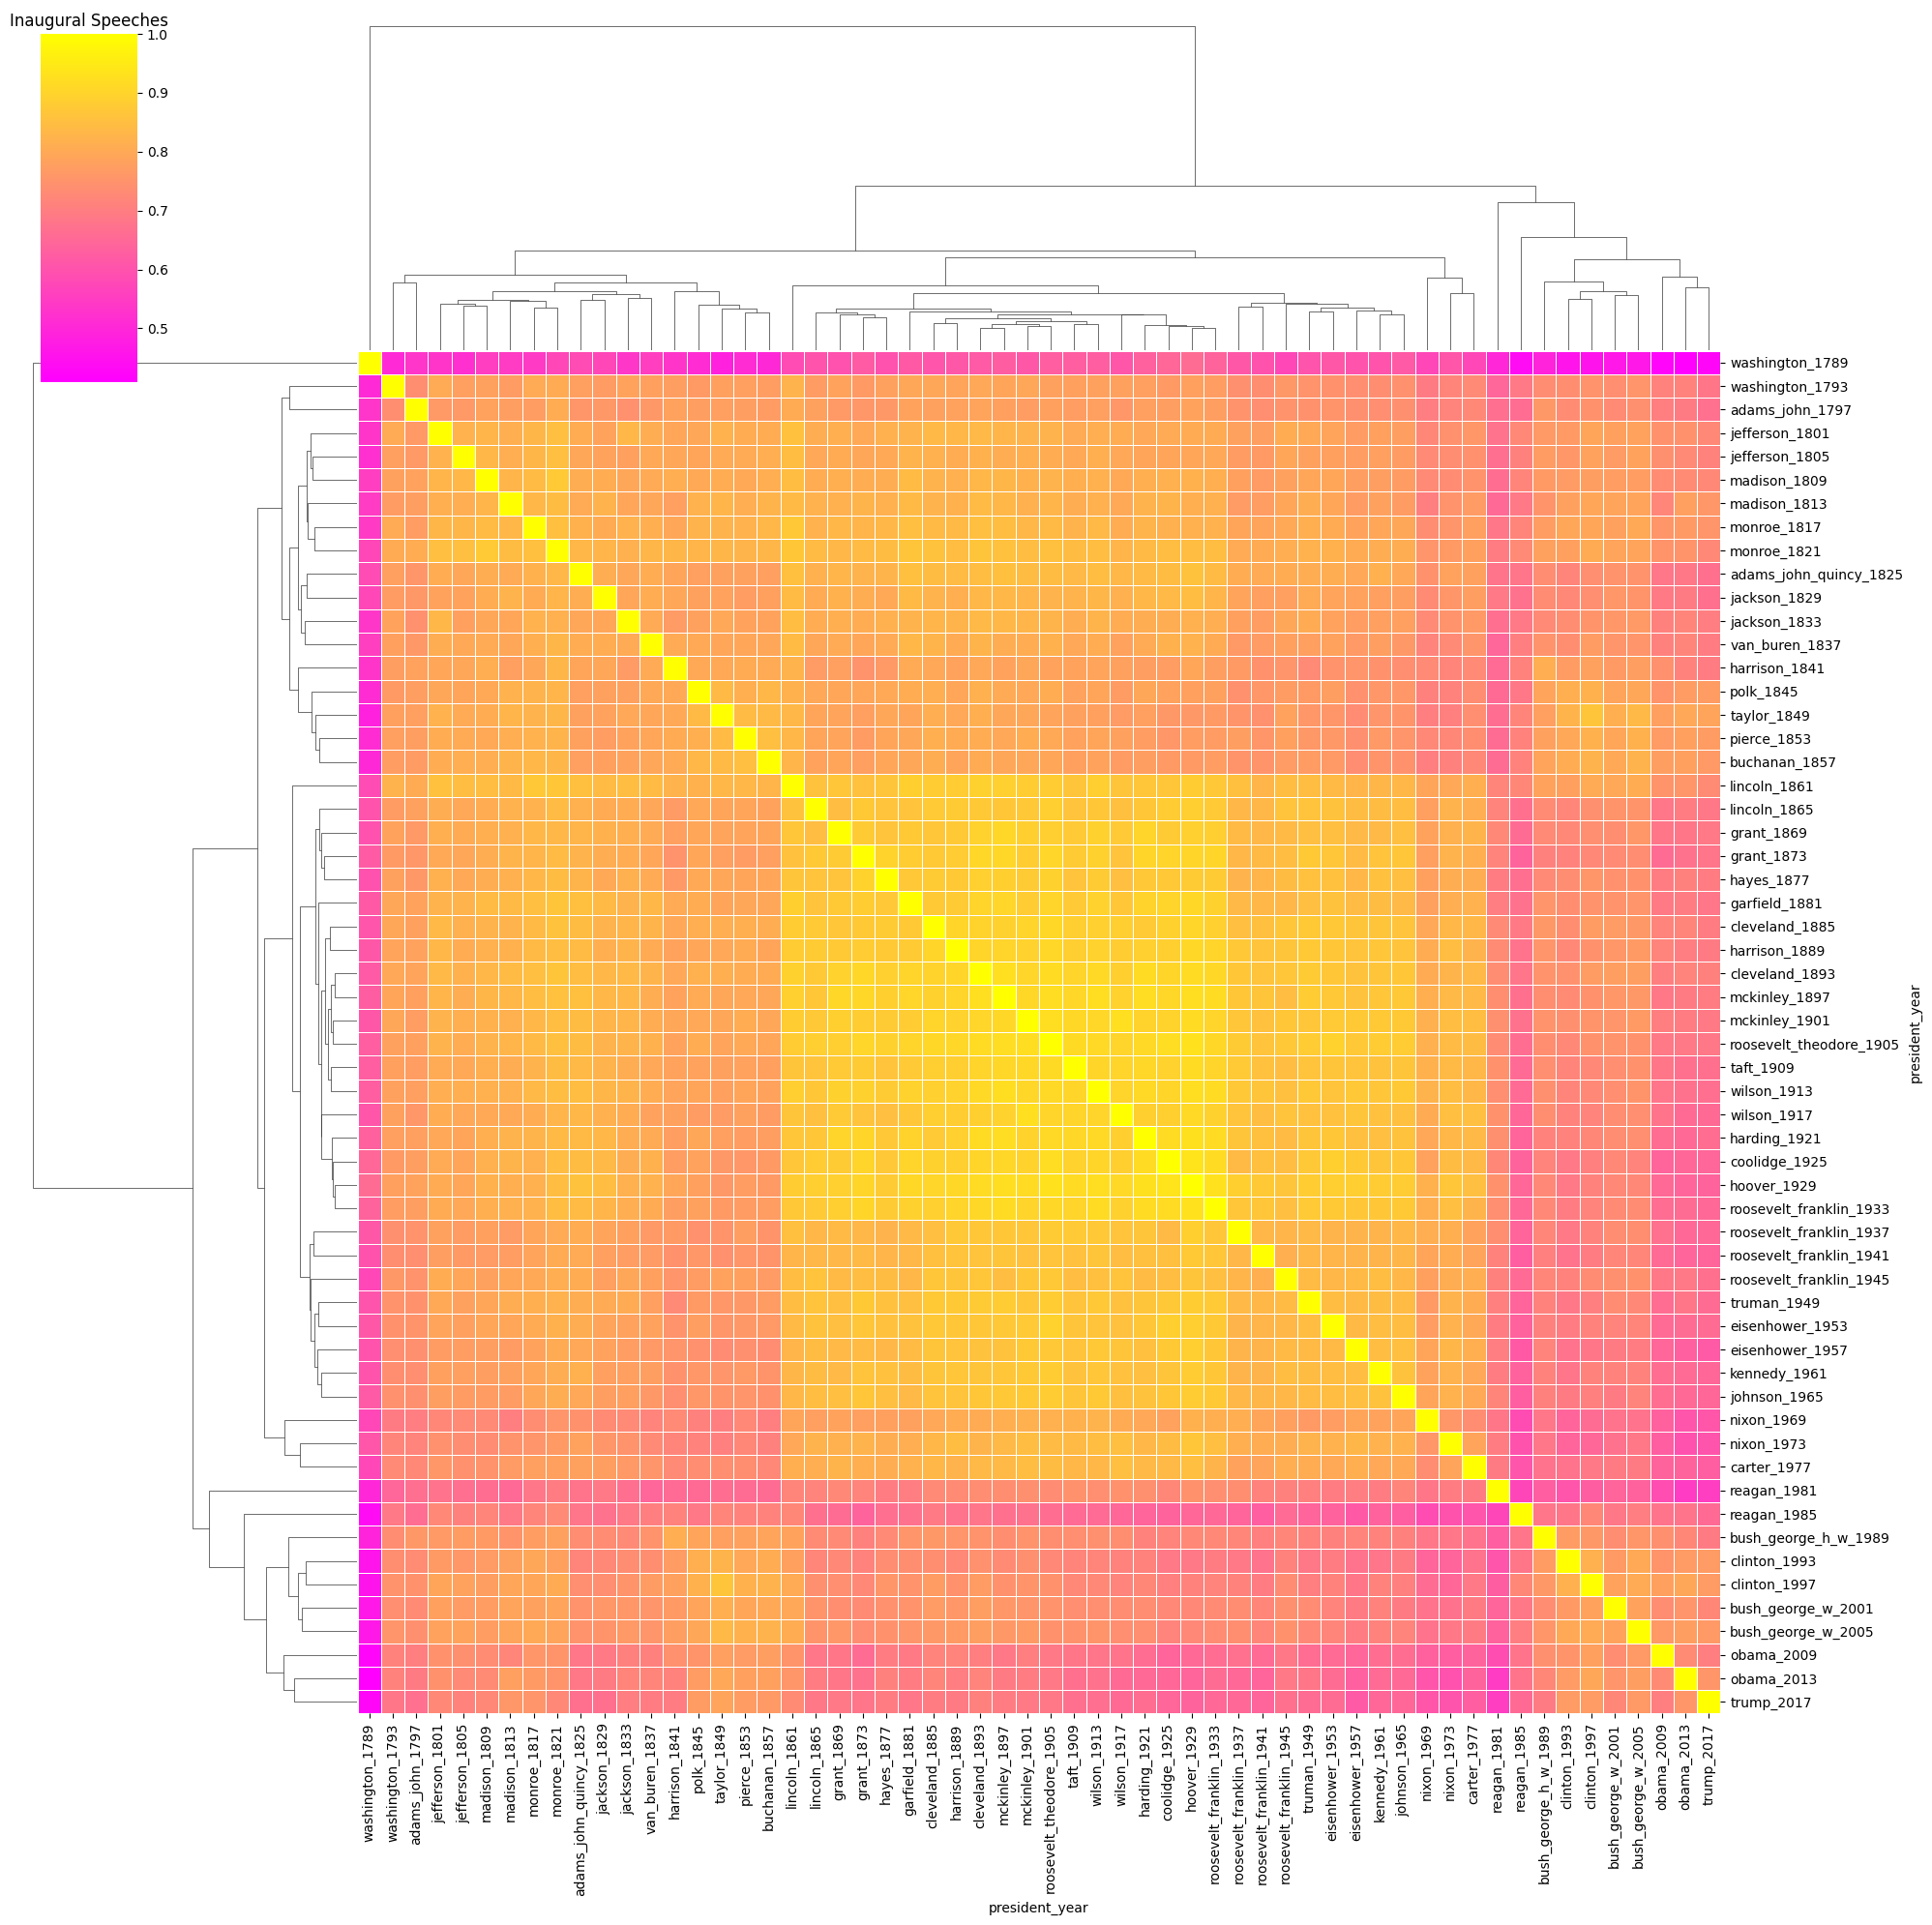

In [ ]:
directory = "/content/drive/MyDrive/Projet_Pandas/US_Inaugural_Addresses/US_Inaugural_Addresses/"
df_president = pd.DataFrame({"path": [path for path in os.listdir(directory) if path[0].isdigit()]})
df_president["year"] = df_president["path"].apply(lambda x: x[-8:-4])
df_president["president_year"] = df_president["path"].apply(lambda x: x[3:-4])
df_president["speech"] = df_president["path"].apply(lambda x: open(directory+x, 'r').read().replace("\t", " "))

df_president = df_president.sort_values(by='year')

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_president['speech'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#Create a clustermap for all speeches
cosine_sim_df = pd.DataFrame(cosine_sim, columns=df_president['president_year'], index=df_president['president_year'])
plt.figure(figsize=(12, 10))

clustermap = sns.clustermap(cosine_sim_df, cmap='spring', linewidths=0.5, annot=False, figsize=(20,20))
sorted_order = df_president['president_year'].tolist()
clustermap.ax_heatmap.set_yticklabels(sorted_order)
clustermap.ax_heatmap.set_xticklabels(sorted_order)

plt.title('Inaugural Speeches')
plt.show()

## 14- Reproduce the plot of Figure 1 considering only the 10 last US president.


<Figure size 1200x1000 with 0 Axes>

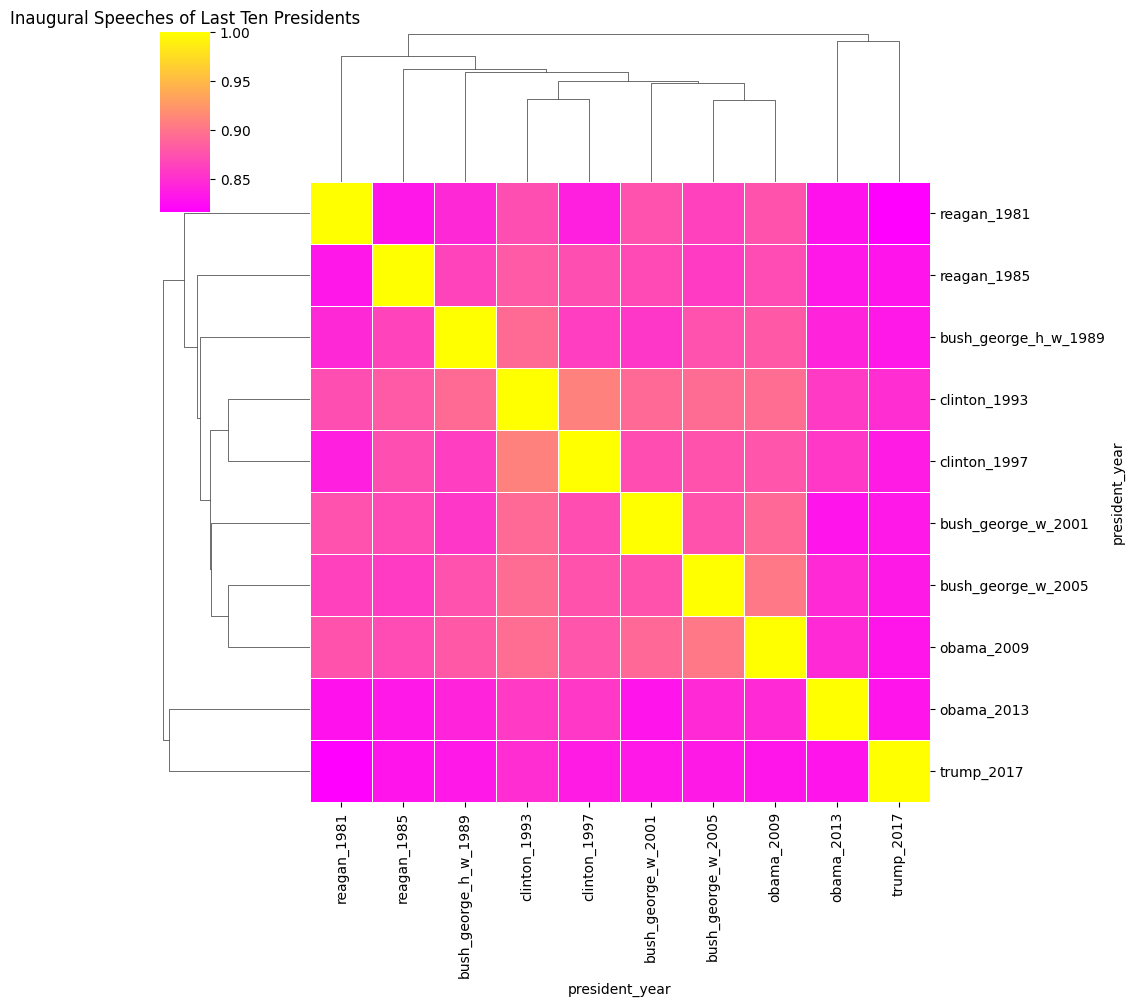

In [ ]:
last_ten_presidents = df_president['president_year'].unique()[-10:]
df_last_ten = df_president[df_president['president_year'].isin(last_ten_presidents)]

#Create a dendrogram for the last ten presidents' speeches
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_last_ten['speech'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#Create a clustermap for the last ten presidents' speeches
cosine_sim_df = pd.DataFrame(cosine_sim, columns=df_last_ten['president_year'], index=df_last_ten['president_year'])
plt.figure(figsize=(12, 10))
clustermap = sns.clustermap(cosine_sim_df, cmap='spring', linewidths=0.5, annot=False, figsize=(10, 10))
sorted_order = df_last_ten['president_year'].tolist()
clustermap.ax_heatmap.set_yticklabels(sorted_order)
clustermap.ax_heatmap.set_xticklabels(sorted_order)
plt.title('Inaugural Speeches of Last Ten Presidents')
plt.show()